In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pickle
from tqdm.notebook import tqdm
import re

In [2]:
import pandas as pd
df = pd.read_excel('text_analysis_ad_sample.xlsx', )
df

,Unnamed: 0,index,商品名称,商品类别,出版年,广告文本,广告标题
0,0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...,...
495,495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


## 分词

In [3]:
import jieba
def clean_text(text):
    words = jieba.lcut(text)
    return ' '.join(words)

In [4]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\liang\AppData\Local\Temp\jieba.cache
Loading model cost 1.818 seconds.
Prefix dict has been built successfully.


,Unnamed: 0,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...,...
495,495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


In [5]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

## 构造语料库

In [6]:
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist()
# 过滤掉每个文档里长度为 1 的词
corpus = [[word for word in document if len(word) != 1] for document in corpus]
for document in corpus[:5]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '国币', '大洋', '二角', '五十', '枝装', '每罐', '国币', '大洋', '五角']
['讲求', '卫生', '人生', '本性', '天理', '固然', '人生', '首贵', '逐日', '大便', '通畅', '有序', '天然', '所当', '如此', '如若', '大便', '不利', '肠阻塞', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '此皆须', '服用', '韦廉士', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '医生', '研究会', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '未有', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '上海', '四川', '九十六', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶']
['香味', '馥郁', '不让', '名花', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '婴孩', '自己', '药片', '每年', '此际', '小儿', '肠胃病', '尤以', '南方', '各地', '天气', '充斥', '之区', '然而', '刘君', '福州', '南台', '梅亭', '山馆', '家有', '差肩', '儿女', '秀慧康', '强者', '果何法', '以致', '之乎', '刘君云', '鄙人', 

## 训练词向量模型

In [7]:
from gensim.models import Word2Vec


model = Word2Vec(
    corpus  )

## 呈现词向量

In [8]:
word_list = model.wv.index_to_key
words_vectors = model.wv[word_list]

for word, vector in zip(word_list[:3], words_vectors[:3]):
    print(f"{word}: {vector}")

韦廉士: [-0.22971222  0.30943918  0.07058349  0.11852209  0.06922521 -0.65600485
  0.16495639  0.763503   -0.18988174 -0.1173534  -0.20546746 -0.47731468
 -0.06051837  0.22234608  0.05089905 -0.31517246  0.08791523 -0.58640903
 -0.00645233 -0.73805344  0.19327368  0.14823335  0.14365643 -0.17577288
 -0.17747514  0.02338218 -0.44982317 -0.405337   -0.20500599  0.03229628
  0.40503752 -0.01895876  0.18015543 -0.22421406 -0.3149749   0.41695327
 -0.03507623 -0.39327052 -0.37968308 -0.7501376  -0.06935556 -0.26990402
 -0.12837505  0.07764453  0.33291107 -0.26976958 -0.31291372 -0.07559291
  0.21714939  0.32663825  0.1808652  -0.28374618 -0.11212579  0.08016068
 -0.24219769  0.17712606  0.15193446  0.00533557 -0.4347906   0.07133333
  0.15779224  0.14158382 -0.15629561 -0.02564978 -0.52021813  0.22107416
  0.07072727  0.22616902 -0.4466516   0.3614838  -0.23062348  0.30078986
  0.31661397 -0.10002802  0.38297442  0.15330477 -0.03269412 -0.08011123
 -0.36169046  0.08187998 -0.21057548 -0.002653

In [9]:
model.wv.most_similar('失眠')

[('患者', 0.9942509531974792),
 ('消化', 0.994145929813385),
 ('科学', 0.9941351413726807),
 ('总经理', 0.994036078453064),
 ('世界', 0.9939897060394287),
 ('消毒', 0.9939782619476318),
 ('头痛', 0.99397212266922),
 ('书云', 0.9939548373222351),
 ('肠胃', 0.9939366579055786),
 ('皮肤', 0.9939256310462952)]

## 词向量可视化

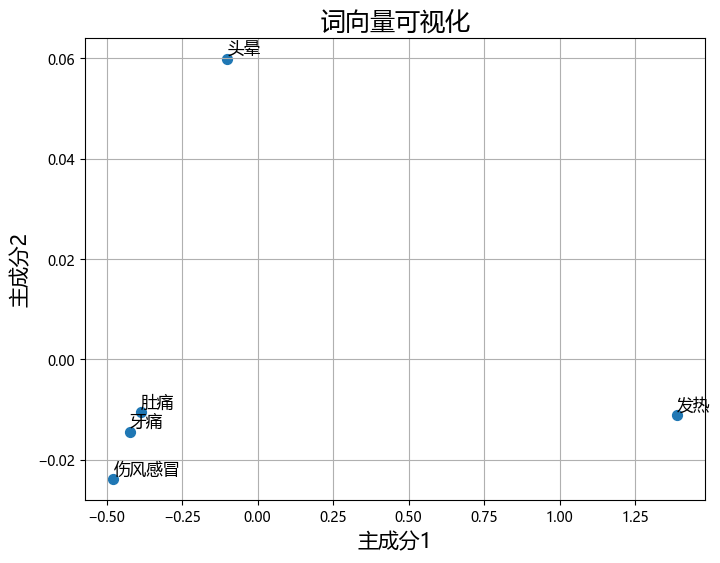

In [19]:
words = ['伤风感冒', '发热', '牙痛', '肚痛','头晕']
# 从训练好的词向量模型中提取这些词的向量
vectors = [model.wv[word] for word in words]

# 引入 PCA（主成分分析）工具用于降维
from sklearn.decomposition import PCA
# 初始化 PCA，设置降维到二维空间
pca = PCA(n_components=2)
# 对原始高维词向量进行降维处理
reduced_vectors = pca.fit_transform(vectors)

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Microsoft YaHei'] #字体


plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], s=50)
# 给每个点添加对应的词标签
for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0]+0.001, reduced_vectors[i, 1]+0.001), fontsize=12)

plt.xlabel('主成分1',fontsize=15)
plt.ylabel('主成分2',fontsize=15)

plt.title('词向量可视化',fontsize=18)
plt.grid(True)
plt.show()


## loss&loss曲线

Loss after epoch 0: 28149.935546875
Loss after epoch 1: 24232.794921875
Loss after epoch 2: 20676.64453125
Loss after epoch 3: 17266.3359375
Loss after epoch 4: 15840.859375
Loss after epoch 5: 15222.515625
Loss after epoch 6: 14761.0078125
Loss after epoch 7: 14309.578125
Loss after epoch 8: 13782.0
Loss after epoch 9: 13266.46875
Loss after epoch 10: 12783.40625
Loss after epoch 11: 12308.65625
Loss after epoch 12: 12120.203125
Loss after epoch 13: 11374.765625
Loss after epoch 14: 10811.59375
Loss after epoch 15: 10721.75
Loss after epoch 16: 10302.078125
Loss after epoch 17: 9462.28125
Loss after epoch 18: 9114.09375
Loss after epoch 19: 9145.125
Loss after epoch 20: 8443.125
Loss after epoch 21: 8035.71875
Loss after epoch 22: 7997.84375
Loss after epoch 23: 7763.34375
Loss after epoch 24: 7598.59375
Loss after epoch 25: 7209.59375
Loss after epoch 26: 8500.9375
Loss after epoch 27: 7001.28125
Loss after epoch 28: 8120.3125
Loss after epoch 29: 6685.40625
Loss after epoch 30: 7781

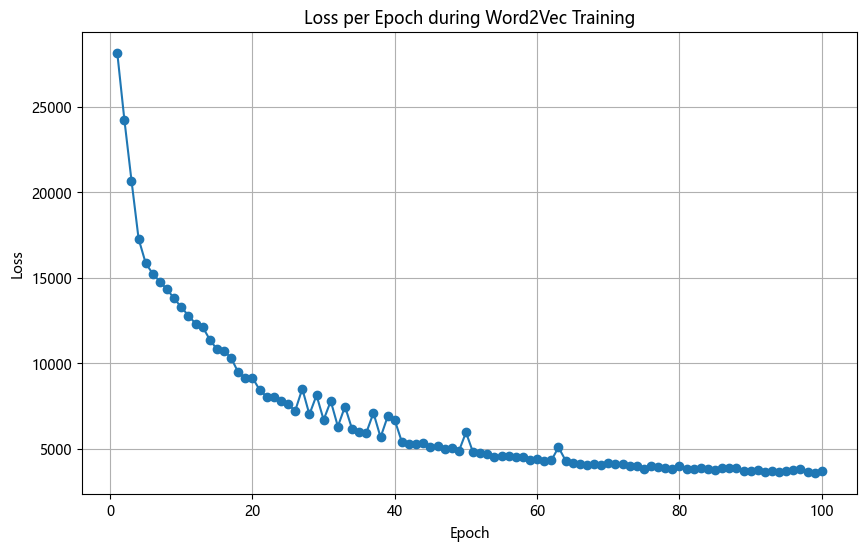

In [20]:
import matplotlib.pyplot as plt
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec
import logging

# 定义用于记录 loss 的回调类
class LossCallback(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        self.loss_previous_step = 0.0
        self.losses = []  # 用于保存每个 epoch 的 loss

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_previous_step
        self.losses.append(loss_now)
        self.loss_previous_step = loss
        logging.info(f'Loss after epoch {self.epoch}: {loss_now}')
        print(f'Loss after epoch {self.epoch}: {loss_now}')
        self.epoch += 1

# 准备你的语料（替换为你的实际语料）
# corpus = [...]

# 实例化回调器
loss_logger = LossCallback()

# 训练模型
model = Word2Vec(corpus, epochs=100, compute_loss=True, callbacks=[loss_logger], seed=42)

# 绘制 loss 曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_logger.losses) + 1), loss_logger.losses, marker='o')
plt.title('Loss per Epoch during Word2Vec Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig('word2vec_loss_curve.jpg')  # 保存为图片
plt.show()
